In [1]:
# Importar las librerias necesarias para hacer un EDA   
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Leer los datos
df_imss = pd.read_csv('data/tidy_imss.csv')
df_agp = pd.read_csv('data/tidy_agricultura_ganaderia_pesca.csv')

In [6]:
df_agp

,ANO,SECTOR,CVE_DDR,CVE_MUN,ESPECIE_CULTIVO,TIPO,PRODTON,VALPROD
0,2018-01-01,Agricultura,146,52,Rye grass en verde,Plantas forrajeras,0.0,0.000
1,2018-01-01,Agricultura,146,52,Sorgo forrajero en verde,Plantas forrajeras,23275.2,19551.170
2,2018-01-01,Agricultura,146,52,Trigo forrajero verde,Plantas forrajeras,0.0,0.000
3,2018-01-01,Agricultura,146,69,Litchi,Frutales,0.0,0.000
4,2018-01-01,Agricultura,146,69,Avena forrajera en verde,Plantas forrajeras,56.8,49.420
...,...,...,...,...,...,...,...,...
8729,2021-01-01,Pesca,193,48,Cintilla,Captura,520.0,2.600
8730,2021-01-01,Pesca,193,55,Lenguado,Captura,700.0,14.000
8731,2021-01-01,Pesca,193,55,Sardina,Captura,77837.0,221.835
8732,2021-01-01,Pesca,147,29,Bagre,Captura,7000.0,140.000


In [7]:
df_imss

,rango_salarial,asegurados,no_trabajadores,año,mes,fecha,municipio,sector_economico_1,sector_economico_2,sector_economico_4,tamaño_patronal,sexo,rango_edad,rango_salarial_descripcion
0,W2,4,0,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Con un puesto de trabajo,Hombre,Mayor o igual a 55 y menor a 60 años de edad,mayor a 1 y hasta 2 veces el salario mínimo
1,W2,4,0,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Con un puesto de trabajo,Hombre,Mayor o igual a 60 y menor a 65 años de edad,mayor a 1 y hasta 2 veces el salario mínimo
2,W7,1,0,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Con un puesto de trabajo,Hombre,Mayor o igual a 60 y menor a 65 años de edad,mayor a 6 y hasta 7 veces el salario mínimo
3,W2,3,0,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Con un puesto de trabajo,Hombre,Mayor o igual a 65 y menor a 70 años de edad,mayor a 1 y hasta 2 veces el salario mínimo
4,W14,1,0,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Con un puesto de trabajo,Hombre,Mayor o igual a 70 y menor a 75 años de edad,mayor a 13 y hasta 14 veces el salario mínimo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629634,W9,1,0,2022,12,2022-12-01,SAN IGNACIO RÍO MUERTO,"Agricultura, ganadería, silvicultura, pesca y ...",Pesca,Acuicultura,con 6 y hasta 50 puestos de trabajo,Hombre,Mayor o igual a 50 y menor a 55 años de edad,mayor a 8 y hasta 9 veces el salario mínimo
629635,W4,1,0,2022,12,2022-12-01,SAN IGNACIO RÍO MUERTO,"Agricultura, ganadería, silvicultura, pesca y ...",Pesca,Acuicultura,con 6 y hasta 50 puestos de trabajo,Mujer,Mayor o igual a 25 y menor a 30 años de edad,mayor a 3 y hasta 4 veces el salario mínimo
629636,W3,1,0,2022,12,2022-12-01,SAN IGNACIO RÍO MUERTO,"Agricultura, ganadería, silvicultura, pesca y ...",Pesca,Acuicultura,con 6 y hasta 50 puestos de trabajo,Mujer,Mayor o igual a 30 y menor a 35 años de edad,mayor a 2 y hasta 3 veces el salario mínimo
629637,W2,1,0,2022,12,2022-12-01,SAN IGNACIO RÍO MUERTO,"Agricultura, ganadería, silvicultura, pesca y ...",Pesca,Acuicultura,con 6 y hasta 50 puestos de trabajo,Mujer,Mayor o igual a 35 y menor a 40 años de edad,mayor a 1 y hasta 2 veces el salario mínimo


In [8]:
#Los datos de producción estan dados por año, por lo que voy a homologar los datos del imss para tener la cantidad de regristos anuales.
df_imss["fecha"] = pd.to_datetime(df_imss["fecha"])
df_imss["ANO"] = df_imss["fecha"].dt.year
#Y le daré el mismo formato a la columna de año de la tabla de agp
df_agp["ANO"] = pd.to_datetime(df_agp["ANO"])
df_agp["ANO"] = df_agp["ANO"].dt.year

In [9]:
#Registros anuales por sector
df_imss = df_imss.rename(columns={'sector_economico_2':'SECTOR'})
imss_registros_anual = df_imss[['ANO', 'SECTOR']].groupby(['ANO','SECTOR'])['SECTOR'].count()
imss_registros_anual = imss_registros_anual.unstack('SECTOR')
imss_registros_anual['TOTAL'] = imss_registros_anual[['Agricultura', 'Ganadería', 'Pesca']].sum(axis=1)
imss_registros_anual

SECTOR,Agricultura,Ganadería,Pesca,TOTAL
ANO,,,,
2018,66889,33499,24039,124427
2019,68269,33685,24405,126359
2020,65607,33510,22442,121559
2021,66604,34224,23207,124035
2022,71632,36710,24917,133259


In [10]:
#Produccion anual por sector
produccion_total_anual = df_agp[['ANO','SECTOR','PRODTON']].groupby(['ANO','SECTOR'])['PRODTON'].sum()
produccion_total_anual = produccion_total_anual.unstack('SECTOR').drop(index = 2023)
produccion_total_anual['TOTAL'] = produccion_total_anual[['Agricultura', 'Ganadería', 'Pesca']].sum(axis=1)
produccion_total_anual

SECTOR,Agricultura,Ganadería,Pesca,TOTAL
ANO,,,,
2018,6989429.11,646952.062,661398663.0,6.690350e+08
2019,6893661.45,674796.481,613382988.0,6.209514e+08
2020,6597600.09,691044.908,604614501.0,6.119031e+08
2021,7049489.47,714327.130,842868074.0,8.506319e+08
2022,475858.88,731899.576,705816585.0,7.070243e+08


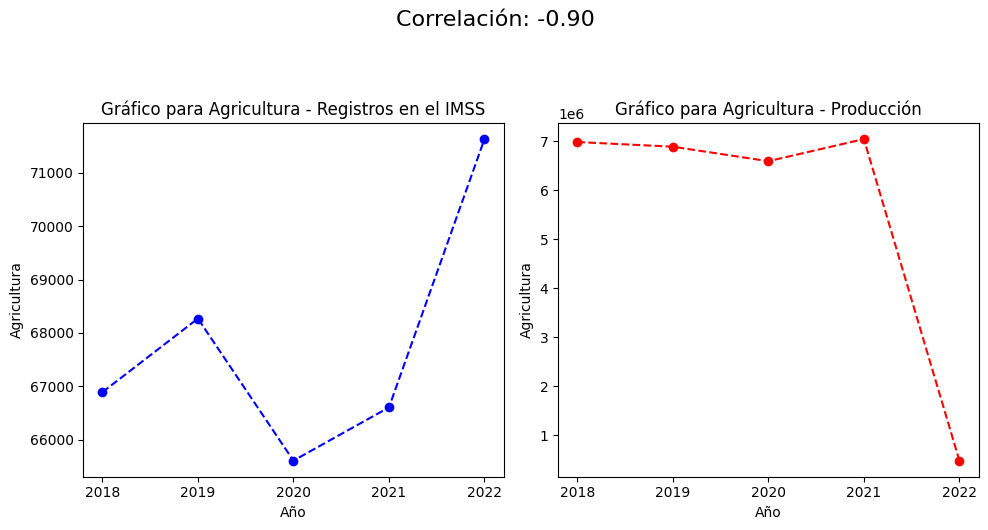

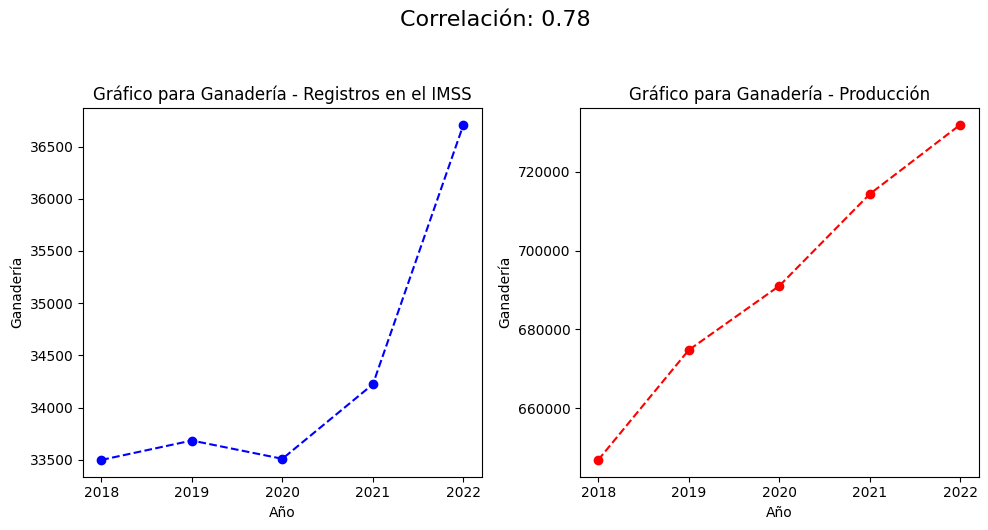

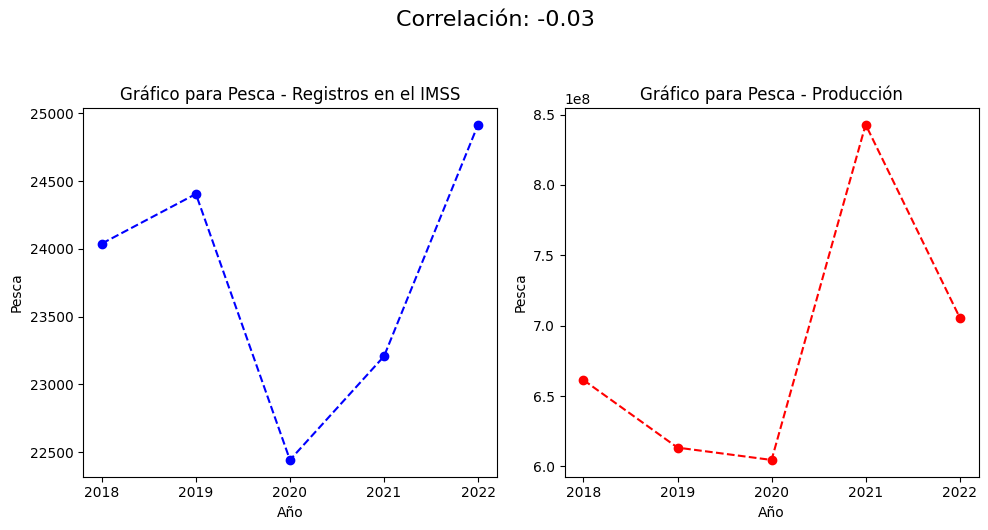

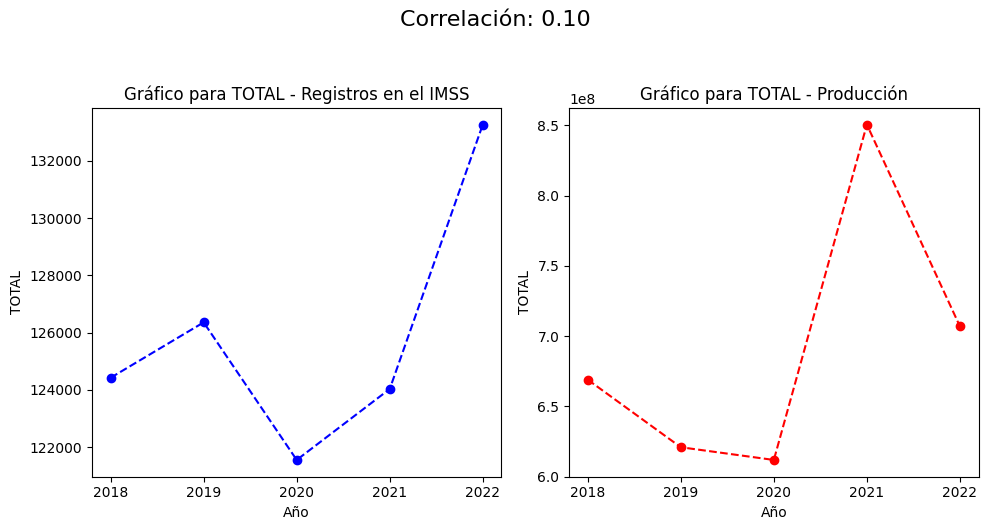

In [11]:
# Se realizan graficas por pares, para comparar el comportamiento de los registros y la produccion anual en cada sector
columns = produccion_total_anual.columns

for column in columns:
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(imss_registros_anual.index, imss_registros_anual[column], marker='o', linestyle='--', color='b')
    plt.title(f'Gráfico para {column} - Registros en el IMSS')
    plt.xlabel('Año')
    plt.xticks(imss_registros_anual.index)
    plt.ylabel(column)

    plt.subplot(1, 2, 2)
    plt.plot(produccion_total_anual.index, produccion_total_anual[column], marker='o', linestyle='--', color='r')
    plt.title(f'Gráfico para {column} - Producción')
    plt.xlabel('Año')
    plt.xticks(produccion_total_anual.index)
    plt.ylabel(column)

    correlation = np.corrcoef(imss_registros_anual[column], produccion_total_anual[column])[0, 1]
    plt.suptitle(f'Correlación: {correlation:.2f}', y=1.05, fontsize=16)
    

    plt.tight_layout()
    plt.show()

In [16]:
produccion_municipio_anual = df_agp[['ANO','CVE_MUN','PRODTON']].groupby(['ANO','CVE_MUN'])['PRODTON'].sum().sort_index(level=0)
produccion_municipio_anual = produccion_municipio_anual.unstack().drop(index = 2023)
produccion_municipio_anual

CVE_MUN,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
ANO,,,,,,,,,,,,,,,,,,,,,
2018,32311.464,26655.874,11737.817,112845.558,15627.562,38155.001,4028.366,4616.577,8514.690,5909.528,...,1814.132,30115.653,15223.398,112055.615,6639.408,11029.469,5653.865,30481.430,277580.712,313962.339
2019,26301.328,29809.465,17877.309,112609.607,16142.846,30667.124,2546.113,3489.919,9368.295,4308.661,...,2091.372,27616.629,8098.354,93514.276,6009.900,11032.117,6200.905,27744.760,307450.649,331081.075
2020,26639.615,31103.286,11492.257,116440.175,12741.736,32222.659,2823.436,3588.014,8386.459,4497.238,...,2021.892,26267.265,7615.685,86682.106,6262.870,7481.455,5929.390,31337.383,334025.808,321728.239
2021,15758.730,19662.420,17367.550,176123.530,14247.130,27270.540,2149.970,5197.410,9021.070,5546.720,...,2570.560,42782.430,6573.540,61056.880,6801.820,12411.430,9028.950,27037.580,320167.480,349030.450
2022,1165.246,1037.273,9952.412,170914.123,803.015,2780.818,2953.155,539.864,553.753,498.367,...,430.933,1525.295,1777.284,13252.851,766.346,2330.703,1260.493,128.923,4067.272,1690.632


In [17]:
claves_df = pd.read_csv('diccionarios\cvemun.csv', names=['cve_mun', 'municipio'])

df_imss['municipio'] = df_imss['municipio'].str.upper()
claves_df['municipio'] = claves_df['municipio'].str.upper()

df_imss_claves = pd.merge(df_imss, claves_df, on='municipio', how='left')

In [18]:
imss_municipio_anual = df_imss_claves[['ANO','cve_mun']].groupby(['ANO','cve_mun'])['cve_mun'].count()
imss_municipio_anual = imss_municipio_anual.unstack().fillna(0)
imss_municipio_anual

cve_mun,1,2,3,4,5,6,8,10,11,12,...,62,63,64,65,66,67,69,70,71,72
ANO,,,,,,,,,,,,,,,,,,,,,
2018,80.0,1357.0,304.0,1650.0,41.0,57.0,0.0,5.0,25.0,1010.0,...,36.0,5.0,49.0,10.0,530.0,24.0,11.0,552.0,1263.0,897.0
2019,24.0,1331.0,264.0,1594.0,88.0,58.0,0.0,12.0,36.0,898.0,...,36.0,9.0,151.0,10.0,656.0,32.0,12.0,610.0,1387.0,1137.0
2020,24.0,1228.0,258.0,1451.0,89.0,67.0,11.0,12.0,36.0,826.0,...,36.0,0.0,214.0,0.0,657.0,51.0,12.0,524.0,1488.0,1085.0
2021,32.0,1292.0,289.0,1500.0,51.0,61.0,12.0,12.0,35.0,840.0,...,46.0,0.0,223.0,0.0,679.0,51.0,12.0,581.0,1436.0,1121.0
2022,37.0,1359.0,303.0,1508.0,47.0,73.0,12.0,12.0,36.0,1062.0,...,34.0,0.0,204.0,36.0,637.0,37.0,3.0,722.0,1491.0,1398.0


In [19]:
mun_corr = pd.DataFrame()
for cve in claves_df['cve_mun']:
    try:
        mun_corr = mun_corr.append({
            'cve_mun': cve,
            'correlation':np.corrcoef(imss_municipio_anual[cve],produccion_municipio_anual[cve])[0,1]
        }, ignore_index  = True)
    except KeyError:
        pass

C:\Users\Rodolfo Jaramillo\AppData\Local\Temp\ipykernel_15324\1209031984.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mun_corr = mun_corr.append({
C:\Users\Rodolfo Jaramillo\AppData\Local\Temp\ipykernel_15324\1209031984.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mun_corr = mun_corr.append({
C:\Users\Rodolfo Jaramillo\AppData\Local\Temp\ipykernel_15324\1209031984.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mun_corr = mun_corr.append({
C:\Users\Rodolfo Jaramillo\AppData\Local\Temp\ipykernel_15324\1209031984.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mun_corr = mun_corr.append({
C:\Users\Rodolfo Jaramillo\A

In [20]:
mun_corr_top = mun_corr.loc[mun_corr['correlation'] > 0.75]
mun_corr_top=pd.merge(mun_corr_top, claves_df, on = 'cve_mun')[['municipio', 'cve_mun', 'correlation']]
mun_corr_top

,municipio,cve_mun,correlation
0,CARBÓ,20.0,0.803296
1,PITIQUITO,47.0,0.876945
2,SANTA CRUZ,59.0,0.770706
3,YÉCORA,69.0,0.892113


In [ ]:
#Registros anuales por sector por municipio
df_imss_top_corr = df_imss[df_imss['municipio'].isin(mun_corr_top['municipio'])]
imss_registros_anual_top_corr = df_imss_top_corr[['ANO', 'SECTOR', 'municipio']].groupby(['ANO','SECTOR', 'municipio'])['SECTOR'].count()
imss_registros_anual_top_corr = imss_registros_anual_top_corr.unstack('SECTOR')
imss_registros_anual_top_corr['TOTAL'] = imss_registros_anual_top_corr[['Agricultura', 'Ganadería', 'Pesca']].sum(axis=1)
imss_registros_anual_top_corr

SECTOR           Agricultura  Ganadería  Pesca   TOTAL
ANO  municipio                                        
2018 CARBÓ              71.0        NaN    NaN    71.0
     PITIQUITO         506.0      229.0   64.0   799.0
     SANTA CRUZ          NaN       36.0    NaN    36.0
     YÉCORA              NaN       11.0    NaN    11.0
2019 CARBÓ              52.0        NaN    NaN    52.0
     PITIQUITO         453.0      145.0   84.0   682.0
     SANTA CRUZ          NaN       18.0    NaN    18.0
     YÉCORA              NaN       12.0    NaN    12.0
2020 CARBÓ              64.0        2.0    NaN    66.0
     PITIQUITO         590.0      130.0  107.0   827.0
     SANTA CRUZ          NaN       17.0    NaN    17.0
     YÉCORA              NaN       12.0    NaN    12.0
2021 CARBÓ              24.0       12.0    NaN    36.0
     PITIQUITO         702.0      161.0  145.0  1008.0
     SANTA CRUZ          NaN       15.0    NaN    15.0
     YÉCORA              NaN       12.0    NaN    12.0
2022 CARBÓ              24.0       12.0    NaN    36.0
     PITIQUITO         506.0      218.0  138.0   862.0
     SANTA CRUZ          NaN        5.0    NaN     5.0
     YÉCORA              NaN        3.0    NaN     3.0

In [ ]:
#Produccion anual por sector por municipio
df_agp_top_corr = df_agp[df_agp['CVE_MUN'].isin(mun_corr_top['cve_mun'])]
prod_mun_top_corr = df_agp_top_corr[['ANO','SECTOR','PRODTON','CVE_MUN']].groupby(['ANO','SECTOR','CVE_MUN'])['PRODTON'].sum()
prod_mun_top_corr = prod_mun_top_corr.unstack('SECTOR')
prod_mun_top_corr['TOTAL'] = prod_mun_top_corr[['Agricultura', 'Ganadería', 'Pesca']].sum(axis=1)
prod_mun_top_corr

SECTOR        Agricultura  Ganadería      Pesca        TOTAL
ANO  CVE_MUN                                                
2018 20         100149.84   6279.307        NaN   106429.147
     47          34113.46   1304.375  1205273.0  1240690.835
     59          11069.27    342.478        NaN    11411.748
     69           4390.37   1263.495        NaN     5653.865
2019 20          91044.00   6964.938        NaN    98008.938
     47          26755.02   1506.761   950106.0   978367.781
     59          10064.10    325.029        NaN    10389.129
     69           4905.02   1295.885        NaN     6200.905
2020 20          88964.95   7154.445        NaN    96119.395
     47          28437.63   1543.647  1719601.0  1749582.277
     59          10294.25    362.466        NaN    10656.716
     69           4694.62   1234.770        NaN     5929.390
2021 20          57019.90   7665.160        NaN    64685.060
     47          24022.60   1581.830  1931169.0  1956773.430
     59           7889.77    396.540        NaN     8286.310
     69           7775.78   1253.170        NaN     9028.950
2022 20               NaN   7355.416        NaN     7355.416
     47               NaN   1613.128  1860511.0  1862124.128
     59               NaN    407.149        NaN      407.149
     69               NaN   1260.493        NaN     1260.493

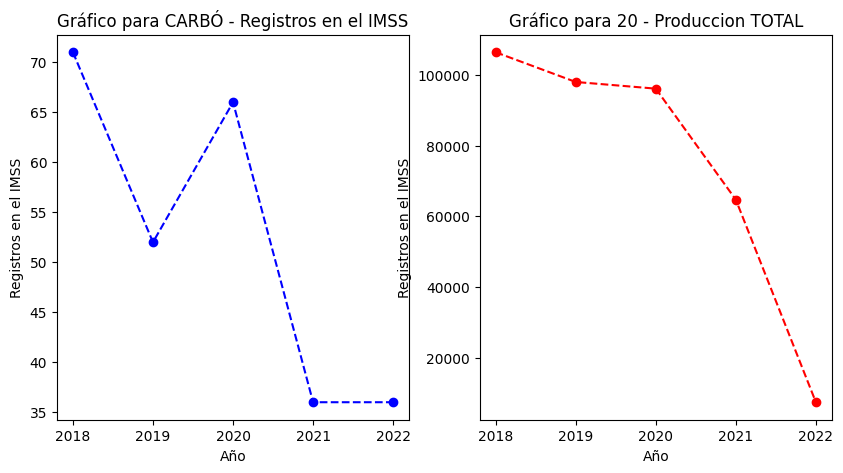

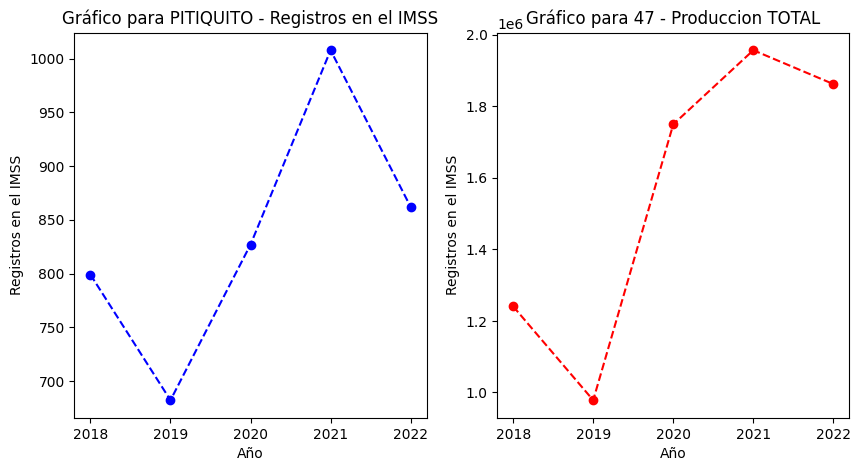

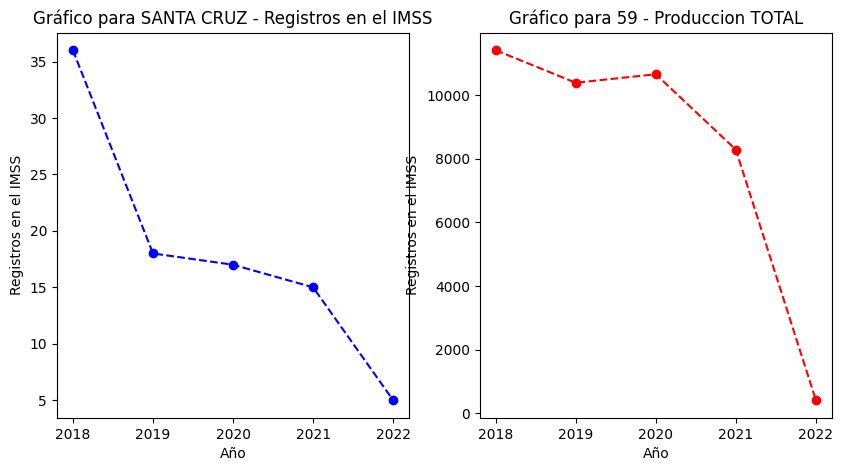

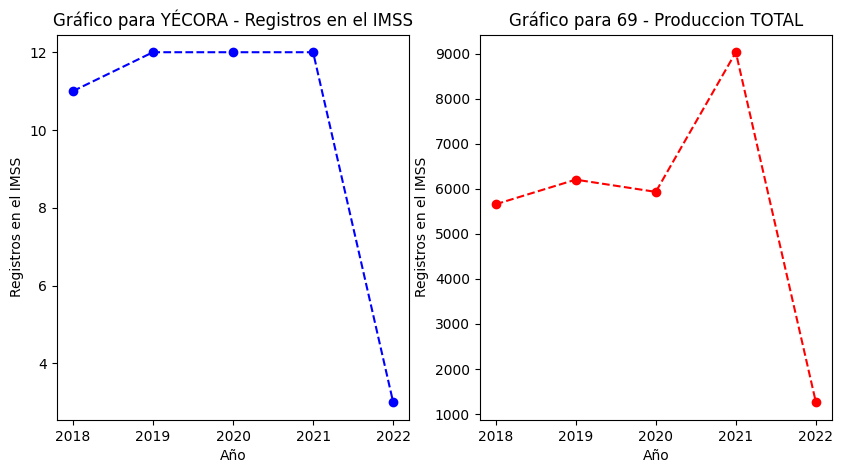

In [ ]:
# Graficar el total de cada municipio a lo largo de los años
municipios = imss_registros_anual_top_corr.index.get_level_values('municipio').unique()
claves = prod_mun_top_corr.index.get_level_values('CVE_MUN').unique()
years = imss_registros_anual_top_corr.index.get_level_values('ANO').unique()

for municipio in zip(municipios, claves):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    registros_municipio = imss_registros_anual_top_corr.loc[imss_registros_anual_top_corr.index.get_level_values('municipio') == municipio[0]]
    plt.plot(years, registros_municipio['TOTAL'],marker='o', linestyle='--', color='b')
    plt.title(f'Gráfico para {municipio[0]} - Registros en el IMSS')
    plt.xlabel('Año')
    plt.xticks(imss_registros_anual.index)
    plt.ylabel('Registros en el IMSS')

    plt.subplot(1, 2, 2)
    produccion_municipio = prod_mun_top_corr.loc[prod_mun_top_corr.index.get_level_values('CVE_MUN') == municipio[1]]
    plt.plot(years, produccion_municipio['TOTAL'],marker='o', linestyle='--', color='r')
    plt.title(f'Gráfico para {municipio[1]} - Produccion TOTAL')
    plt.xlabel('Año')
    plt.xticks(imss_registros_anual.index)
    plt.ylabel('Registros en el IMSS')

    plt.show()


In [ ]:
df_imss

,rango_salarial,asegurados,no_trabajadores,año,mes,fecha,municipio,sector_economico_1,SECTOR,sector_economico_4,tamaño_patronal,sexo,rango_edad,rango_salarial_descripcion,ANO
0,W2,4,0,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Con un puesto de trabajo,Hombre,Mayor o igual a 55 y menor a 60 años de edad,mayor a 1 y hasta 2 veces el salario mínimo,2018
1,W2,4,0,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Con un puesto de trabajo,Hombre,Mayor o igual a 60 y menor a 65 años de edad,mayor a 1 y hasta 2 veces el salario mínimo,2018
2,W7,1,0,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Con un puesto de trabajo,Hombre,Mayor o igual a 60 y menor a 65 años de edad,mayor a 6 y hasta 7 veces el salario mínimo,2018
3,W2,3,0,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Con un puesto de trabajo,Hombre,Mayor o igual a 65 y menor a 70 años de edad,mayor a 1 y hasta 2 veces el salario mínimo,2018
4,W14,1,0,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Con un puesto de trabajo,Hombre,Mayor o igual a 70 y menor a 75 años de edad,mayor a 13 y hasta 14 veces el salario mínimo,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629634,W9,1,0,2022,12,2022-12-01,SAN IGNACIO RÍO MUERTO,"Agricultura, ganadería, silvicultura, pesca y ...",Pesca,Acuicultura,con 6 y hasta 50 puestos de trabajo,Hombre,Mayor o igual a 50 y menor a 55 años de edad,mayor a 8 y hasta 9 veces el salario mínimo,2022
629635,W4,1,0,2022,12,2022-12-01,SAN IGNACIO RÍO MUERTO,"Agricultura, ganadería, silvicultura, pesca y ...",Pesca,Acuicultura,con 6 y hasta 50 puestos de trabajo,Mujer,Mayor o igual a 25 y menor a 30 años de edad,mayor a 3 y hasta 4 veces el salario mínimo,2022
629636,W3,1,0,2022,12,2022-12-01,SAN IGNACIO RÍO MUERTO,"Agricultura, ganadería, silvicultura, pesca y ...",Pesca,Acuicultura,con 6 y hasta 50 puestos de trabajo,Mujer,Mayor o igual a 30 y menor a 35 años de edad,mayor a 2 y hasta 3 veces el salario mínimo,2022
629637,W2,1,0,2022,12,2022-12-01,SAN IGNACIO RÍO MUERTO,"Agricultura, ganadería, silvicultura, pesca y ...",Pesca,Acuicultura,con 6 y hasta 50 puestos de trabajo,Mujer,Mayor o igual a 35 y menor a 40 años de edad,mayor a 1 y hasta 2 veces el salario mínimo,2022


In [ ]:
df_agp

,ANO,SECTOR,CVE_DDR,CVE_MUN,ESPECIE_CULTIVO,TIPO,PRODTON,VALPROD
0,2018,Agricultura,146,52,Rye grass en verde,Plantas forrajeras,0.0,0.000
1,2018,Agricultura,146,52,Sorgo forrajero en verde,Plantas forrajeras,23275.2,19551.170
2,2018,Agricultura,146,52,Trigo forrajero verde,Plantas forrajeras,0.0,0.000
3,2018,Agricultura,146,69,Litchi,Frutales,0.0,0.000
4,2018,Agricultura,146,69,Avena forrajera en verde,Plantas forrajeras,56.8,49.420
...,...,...,...,...,...,...,...,...
8729,2021,Pesca,193,48,Cintilla,Captura,520.0,2.600
8730,2021,Pesca,193,55,Lenguado,Captura,700.0,14.000
8731,2021,Pesca,193,55,Sardina,Captura,77837.0,221.835
8732,2021,Pesca,147,29,Bagre,Captura,7000.0,140.000


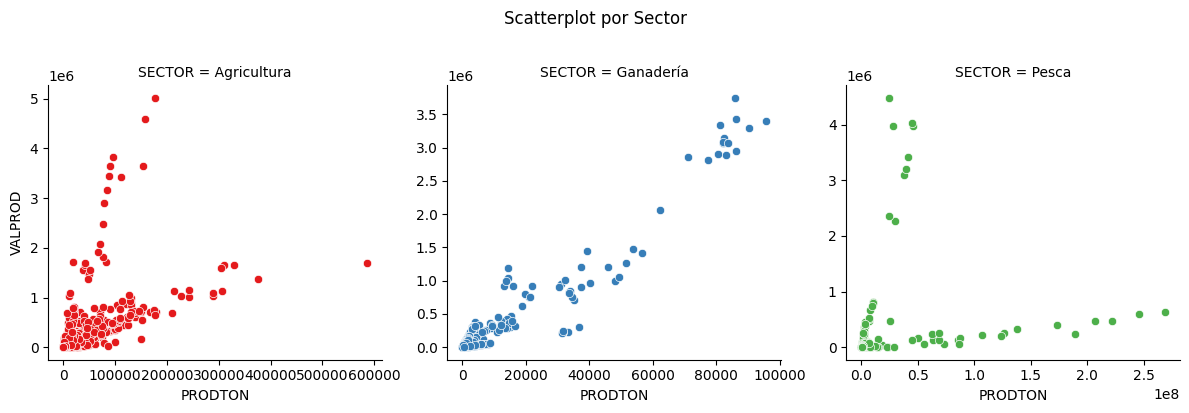

In [21]:
# Crea un FacetGrid con Seaborn
g = sns.FacetGrid(df_agp, col="SECTOR", col_wrap=3, height=4, hue='SECTOR', palette='Set1', sharex=False, sharey=False)

# Mapea un scatterplot en el FacetGrid
g.map(sns.scatterplot, 'PRODTON', 'VALPROD')

# Agrega un título al gráfico
g.fig.suptitle('Scatterplot por Sector', y=1.02)

# Ajusta el diseño
plt.tight_layout()

# Muestra el gráfico
plt.show()

In [6]:
#importing library
from ydata_profiling import ProfileReport



In [7]:
#defining the library
profile = ProfileReport(df_agp)
# exporting your report as a html file
profile.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

d:\Program Files\Python\Python311\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  discretized_df.loc[:, column] = self._discretize_column(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
#defining the library
profile = ProfileReport(df_imss)
# exporting your report as a html file
profile.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]